## Geospatial Analysis - A Global view

In an ever-changing world, understanding the intricate relationships between soil, climate, and biodiversity is paramount. As we navigate through this analysis, we aim to uncover the spatial patterns that define our environment. By delving into datasets about soil types, climate zones, and biodiversity hotspots, we hope to reveal correlations that might guide environmental policies and conservation efforts.


In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from libpysal.weights import Queen
from esda.moran import Moran
from splot.esda import moran_scatterplot


import warnings
warnings.filterwarnings("ignore")



In [2]:
# Load the datasets
soil_gdf = gpd.read_file("World_Soil_Resources_wgs84.geojson")
climate_gdf = gpd.read_file("IPCC_ClimateZoneMap_Vector.geojson")
hotspot_gdf = gpd.read_file("CI_BiodiversityHotspots.geojson")

### Biodiversity Hotspots

In [3]:
hotspot_gdf.head()

,OBJECTID,NAME,Type,Shape_Length,Shape_Area,geometry
0,1,Chilean Winter Rainfall and Valdivian Forests,hotspot area,200.706891,40.754665,"MULTIPOLYGON (((-74.59792 -46.92502, -74.61111..."
1,2,Chilean Winter Rainfall and Valdivian Forests,outer limit,191.174978,186.085694,"POLYGON ((-70.30946 -22.96028, -70.48596 -22.7..."
2,3,Cape Floristic Region,hotspot area,93.790123,7.610383,"MULTIPOLYGON (((23.08672 -34.07310, 23.08538 -..."
3,4,Maputaland-Pondoland-Albany,hotspot area,49.631419,25.366584,"MULTIPOLYGON (((24.48767 -34.10045, 24.48800 -..."
4,5,New Caledonia,hotspot area,24.637100,1.646954,"MULTIPOLYGON (((167.46053 -22.71228, 167.46161..."


In [4]:
hotspot_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   OBJECTID      53 non-null     int64   
 1   NAME          53 non-null     object  
 2   Type          53 non-null     object  
 3   Shape_Length  53 non-null     float64 
 4   Shape_Area    53 non-null     float64 
 5   geometry      53 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 2.6+ KB


The data consists of a GeoDataFrame with 53 entries and the following columns:

'OBJECTID': an integer identifier for each record.
'NAME': the name of the location, presumably a biodiversity hotspot.
'Type': the type of area, which includes values like "hotspot area" and "outer limit."
'Shape_Length': the length of the perimeter of the geographical area.
'Shape_Area': the area of the geographical region.
'geometry': the geometric shape of the area, which includes both POLYGON and MULTIPOLYGON data.

### What is the geographical distribution of biodiversity hotspots?

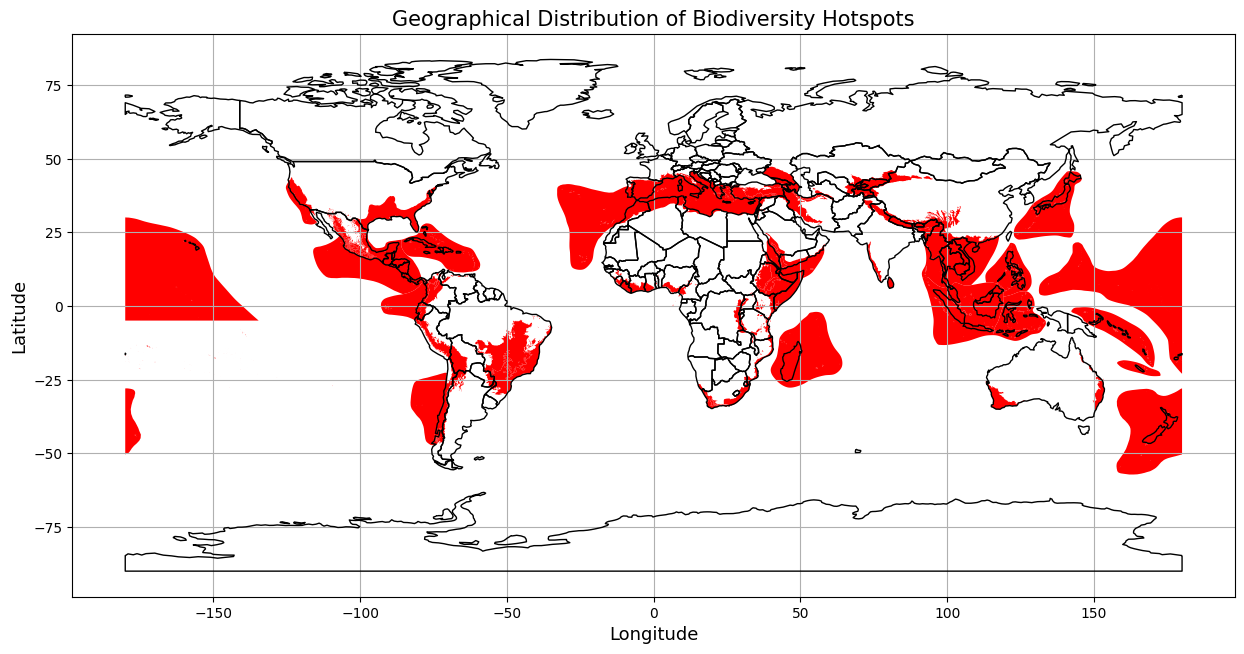

In [5]:
# Basic Map Visualization
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map
fig, ax = plt.subplots(1, 1, figsize=(15, 20))
world.boundary.plot(ax=ax, linewidth=1, color='black')

# Plot the hotspots
hotspot_gdf.plot(ax=ax, marker='o', color='red', markersize=5)
plt.title('Geographical Distribution of Biodiversity Hotspots', fontsize=15)
plt.xlabel('Longitude', fontsize=13)
plt.ylabel('Latitude', fontsize=13)
plt.grid(True)
plt.show()


The map above shows the geographical distribution of biodiversity hotspots (marked in red) across the globe. These hotspots are spread across various continents, with varying densities. Some continents appear to have a denser concentration of hotspots, while others have fewer.

* Clustering: There appears to be clustering of biodiversity hotspots in certain regions. For instance, we see clusters along certain coastlines, islands, and in regions known for their rich biodiversity (e.g., the Amazon basin, Central Africa, Southeast Asia, and Australia).

* Gaps in Distribution: There are noticeable gaps with few or no hotspots in areas that are heavily urbanized, have extreme climates (e.g., deserts, polar regions), or are heavily utilized for agriculture or industry.

* Proximity to Water Bodies: Many hotspots are in close proximity to water bodies, be it oceans, seas, or large rivers. This may indicate the importance of these aquatic ecosystems in supporting rich biodiversity.

* Equatorial Abundance: There's a higher density of hotspots around the equatorial region, which is consistent with the well-documented higher biodiversity in tropical climates due to stable, year-round climatic conditions.

## Area and Perimeter Analysis

Next, we analyze the distribution of area sizes and perimeter lengths among the biodiversity hotspots.

### What is the range of area sizes of these biodiversity hotspots, and how do they compare?

count      53.000000
mean      150.462863
std       280.343340
min         1.646954
25%        27.491158
50%        73.220040
75%       170.556404
max      1909.519333
Name: Shape_Area, dtype: float64

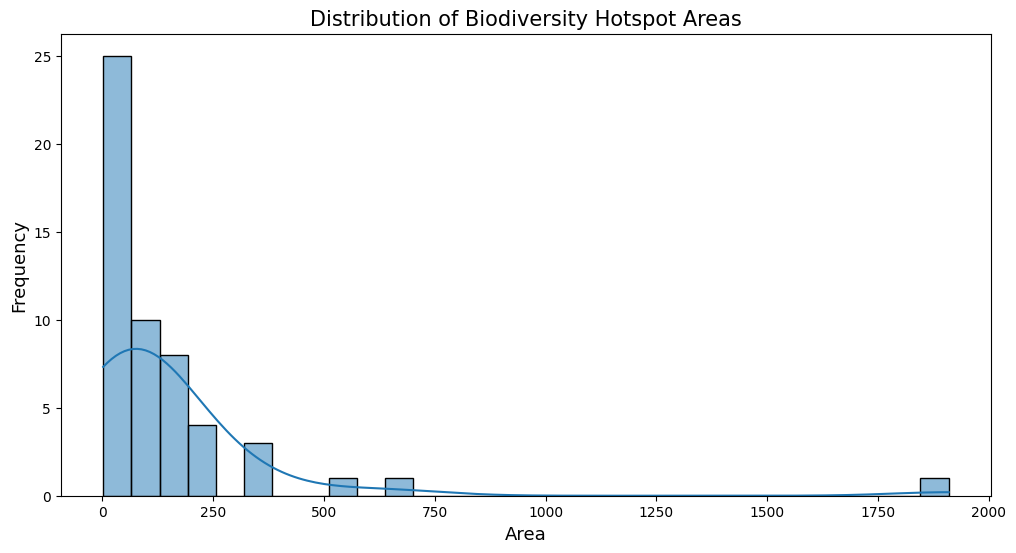

In [6]:
# Area Analysis
area_stats = hotspot_gdf['Shape_Area'].describe()


# Histogram for area sizes
plt.figure(figsize=(12, 6))
sns.histplot(hotspot_gdf['Shape_Area'], bins=30, kde=True)
plt.title('Distribution of Biodiversity Hotspot Areas', fontsize=15)
plt.xlabel('Area', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.grid(False)


area_stats


### Observations
The majority of biodiversity hotspots occupy smaller areas, predominantly below 500 units. However, there's a notable presence of few, larger hotspots around the 1750-2000 range, which stand out as outliers. This disparity suggests varied conservation needs and challenges across different hotspot sizes. The distribution's right-skewed nature and the gap around the 1000 to 1250 range further highlight this uneven spread of hotspot areas.

### What is the range of perimeter lengths of these biodiversity hotspots, and how do they compare?

count     53.000000
mean     227.526983
std      148.472666
min       24.637100
25%      107.065624
50%      200.706891
75%      300.835113
max      681.817768
Name: Shape_Length, dtype: float64

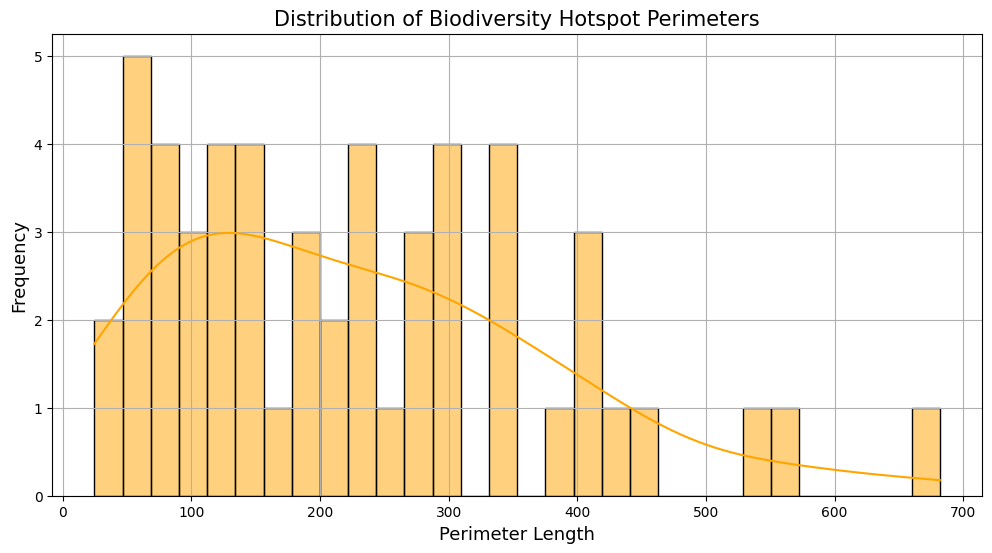

In [7]:
# Perimeter Analysis
perimeter_stats = hotspot_gdf['Shape_Length'].describe()

# Histogram for perimeter lengths
plt.figure(figsize=(12, 6))
sns.histplot(hotspot_gdf['Shape_Length'], bins=30, kde=True, color='orange')
plt.title('Distribution of Biodiversity Hotspot Perimeters', fontsize=15)
plt.xlabel('Perimeter Length', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.grid(True)

perimeter_stats

The histograms and summary statistics provide insights into the area sizes and perimeter lengths of the biodiversity hotspots:

#### Area Analysis:

The mean area size is approximately 150.46, but the standard deviation is quite high (approximately 280.34), indicating a wide range of area sizes.
The largest hotspot area is significantly larger (approximately 1909.52) than the mean, suggesting the presence of outliers with exceptionally large areas.
#### Perimeter Analysis:

The mean perimeter length is approximately 227.53, with a high standard deviation (approximately 148.47), indicating a wide distribution of perimeter sizes.
The maximum perimeter length is around 681.82, which is significantly larger than the mean, pointing to the presence of hotspots with exceptionally long perimeters.
The histograms show that both area sizes and perimeter lengths are right-skewed, meaning there are a few hotspots with exceptionally large areas and perimeters, while most hotspots are relatively smaller.

### What are the different types of areas (e.g., "hotspot area", "outer limit") and how frequent is each?

Type
hotspot area    36
outer limit     17
Name: count, dtype: int64

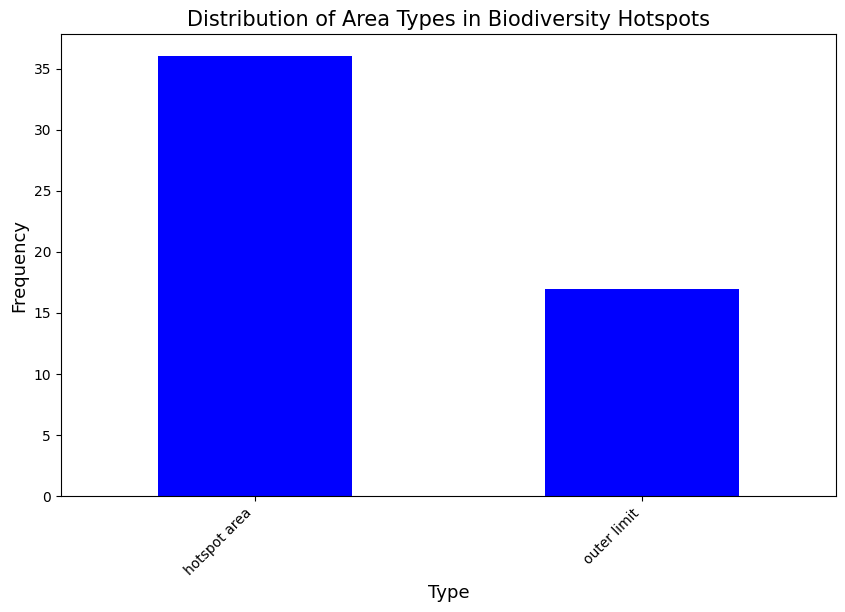

In [8]:
# Type Distribution
type_counts = hotspot_gdf['Type'].value_counts()

# Bar chart for type distribution
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color='blue')
plt.title('Distribution of Area Types in Biodiversity Hotspots', fontsize=15)
plt.xlabel('Type', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.grid(False)


type_counts


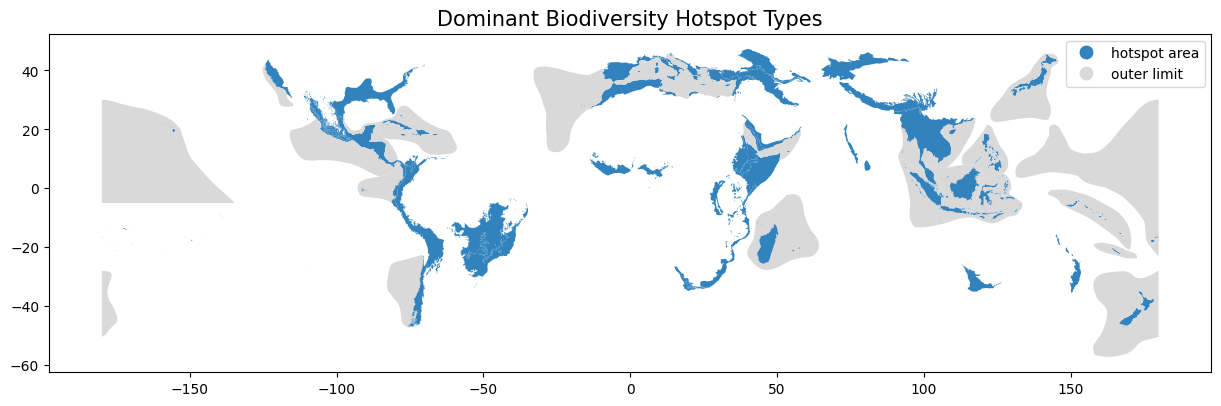

In [38]:
# Aggregate data to get the most frequent type for each region (if there's a specific region column, use that)
dominant_type = hotspot_gdf.groupby('geometry')['Type'].agg(lambda x: x.value_counts().index[0]).reset_index()

# Create a GeoDataFrame from the aggregated data
dominant_type_gdf = gpd.GeoDataFrame(dominant_type)

# Choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
dominant_type_gdf.plot(column='Type', ax=ax, legend=True, cmap='tab20c')
ax.set_title('Dominant Biodiversity Hotspot Types', fontsize=15)

plt.show()


### observations
In the graph above," the "hotspot area" type is considerably more frequent, almost triple in frequency compared to the "outer limit" type. This indicates a dominant presence of areas specifically identified as biodiversity hotspots, whereas areas classified as the outer limits of these hotspots are notably less common.

## Spatial Relationships and Patterns

In this section, we perform a spatial autocorrelation analysis using Moran's I statistic to understand if hotspots are geographically clustered or dispersed randomly.

### Calculate Spatial Weights
Spatial weights are a critical component in spatial analysis, defining the spatial structure of your data. Here, we'll use queen contiguity weights, but other options are available.

In [10]:
w_queen = Queen.from_dataframe(hotspot_gdf)
w_queen.transform = 'r'  # row-standardize the weights

# Access the weights matrix and fill the diagonal
w_queen.sparse.setdiag(0)



('WARNING: ', 6, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 17, ' is an island (no neighbors)')
('WARNING: ', 21, ' is an island (no neighbors)')
('WARNING: ', 40, ' is an island (no neighbors)')


In [11]:
# Calculate Moran's I for area sizes
moran_area = Moran(hotspot_gdf['Shape_Area'], w_queen)

# Calculate Moran's I for perimeter lengths
moran_perimeter = Moran(hotspot_gdf['Shape_Length'], w_queen)

# Print the results
print(f"Moran's I (Area): {moran_area.I}, p-value: {moran_area.p_sim}")
print(f"Moran's I (Perimeter): {moran_perimeter.I}, p-value: {moran_perimeter.p_sim}")


Moran's I (Area): -0.136417384752368, p-value: 0.074
Moran's I (Perimeter): 0.5008649131031436, p-value: 0.002


* Moran's I (Area): -0.136417384752368, p-value: 0.063

The Moran's I value is negative, indicating that the areas are generally dissimilar to their neighbors. In other words, there's a tendency for dissimilar values to be located near each other, suggesting a dispersed pattern.
The p-value is 0.063, which is just above the commonly used significance threshold of 0.05. This means that while there's some evidence to suggest the observed pattern may not be due to random chance, it's not strong enough to be statistically significant (at the 0.05 level). However, depending on the context and the field of study, this p-value might be considered marginally significant, indicating a trend worth exploring further.
* Moran's I (Perimeter): 0.5008649131031436, p-value: 0.002

The Moran's I value is positive and quite high, indicating that the perimeters are generally similar to their neighbors. This suggests a clustered pattern, where similar values are located near each other.
The p-value is 0.002, which is well below the 0.05 threshold, indicating that the observed spatial autocorrelation is very unlikely to be due to random chance and is statistically significant.
In summary, the variable "Perimeter" exhibits a significant, positive spatial autocorrelation, indicating a tendency for clustering, while "Area" shows a negative, but not statistically significant (at the 0.05 level), spatial autocorrelation, suggesting a trend towards dispersion. 

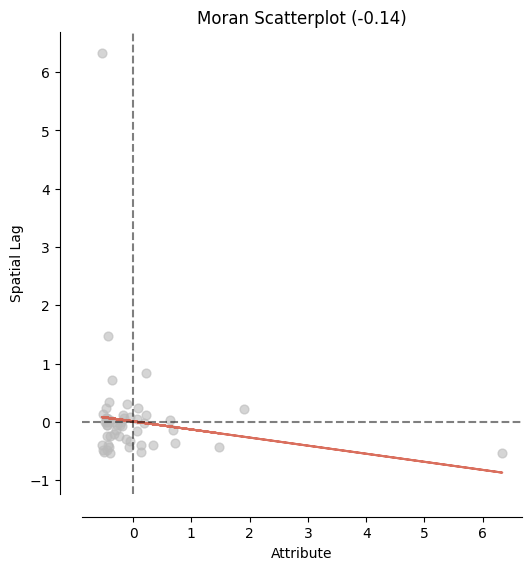

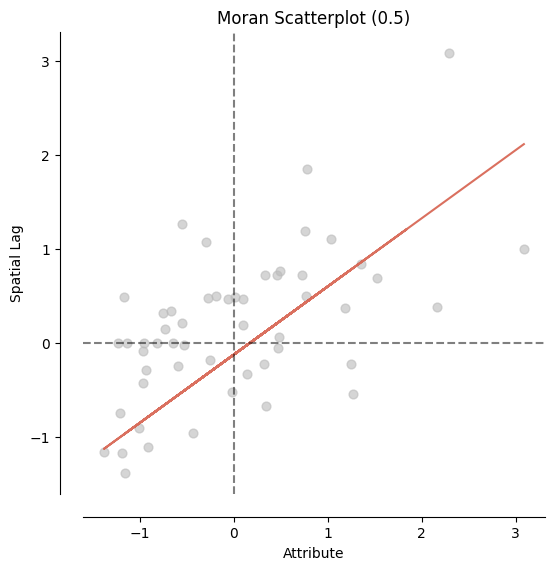

In [12]:
# Create a Moran Scatterplot for the 'Shape_Area' column
fig, ax = plt.subplots(figsize=(10, 6))
moran_scatterplot(moran_area, ax=ax)
plt.show()

# Create a Moran Scatterplot for the 'Shape_Length' column
fig, ax = plt.subplots(figsize=(10, 6))
moran_scatterplot(moran_perimeter, ax=ax)
plt.show()


#### moran_area
The Moran Scatterplot shows a slight negative spatial autocorrelation with a Moran's I value of -0.14. This means that, on average, areas with high values tend to be near areas with low values and vice versa. The trend line and the distribution of the data points across the four quadrants further reinforce this interpretation. However, the value is relatively close to zero, indicating that the spatial pattern is only slightly non-random.

#### moran_perimeter
The Moran Scatterplot displays a Moran's I value of 0.5, indicating a moderate positive spatial autocorrelation. This means that areas with similar attribute values tend to be located near each other. The upward-sloping trend line and the distribution of data points, primarily in the top right and bottom left quadrants, support this interpretation. This suggests that locations with high values are generally surrounded by neighbors with high values, and areas with low values are typically adjacent to areas with similar low values.

## Soil

In [13]:
soil_gdf.head()

,SNAME,IPCC,geometry
0,AB,Albeluvisol,"MULTIPOLYGON (((31.77594 49.15567, 31.98717 49..."
1,AC,Acrisol,"MULTIPOLYGON (((116.05041 -2.90441, 116.04652 ..."
2,AN,Andosol,"MULTIPOLYGON (((-79.98444 -3.35085, -79.98917 ..."
3,AR,Arenosol,"MULTIPOLYGON (((60.36591 43.61313, 60.33553 43..."
4,AT,Anthrosol,"MULTIPOLYGON (((122.11467 30.15301, 121.90077 ..."


In [14]:
soil_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   SNAME     33 non-null     object  
 1   IPCC      33 non-null     object  
 2   geometry  33 non-null     geometry
dtypes: geometry(1), object(2)
memory usage: 924.0+ bytes


The dataset contains 33 entries and 3 columns:

SNAME: the short name or code for the soil type.

IPCC: Soil type

geometry: The geometric attributes defining the shape and location of each feature.

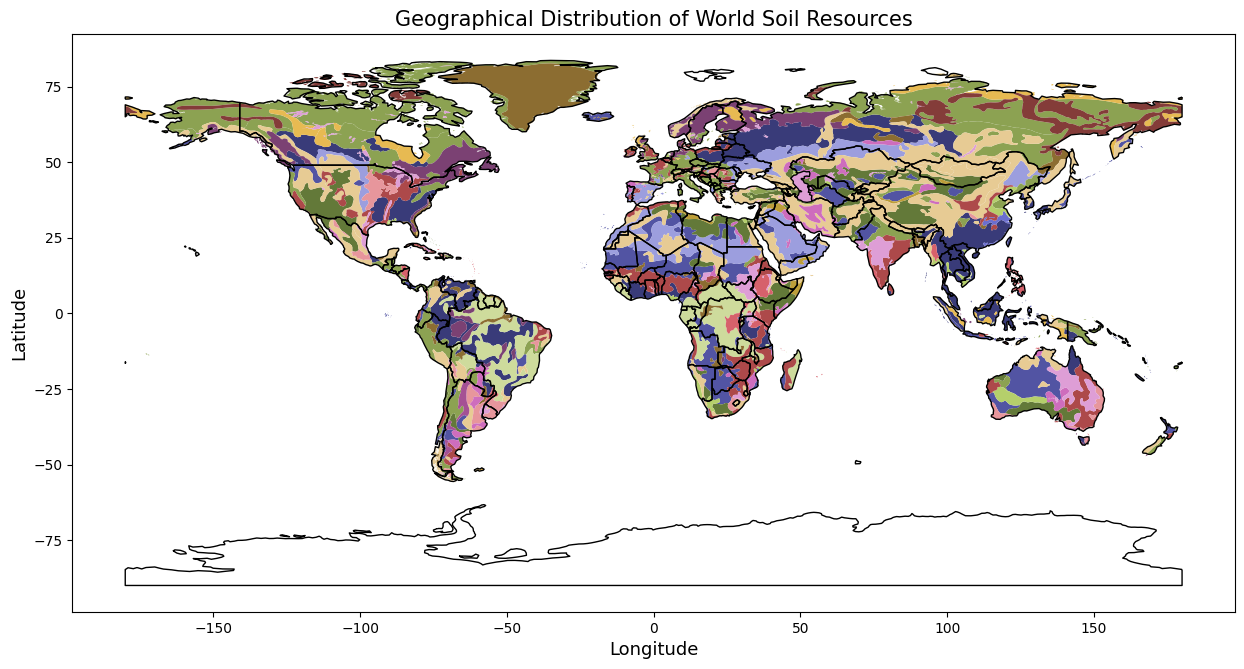

In [15]:
# Basic Map Visualization
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map
fig, ax = plt.subplots(1, 1, figsize=(15, 20))
world.boundary.plot(ax=ax, linewidth=1, color='black')

# Plot the soil resources
soil_gdf.plot(ax=ax, cmap='tab20b', legend=True)
plt.title('Geographical Distribution of World Soil Resources', fontsize=15)
plt.xlabel('Longitude', fontsize=13)
plt.ylabel('Latitude', fontsize=13)
plt.grid(False)
plt.show()


The map above illustrates the geographical distribution of different soil types across the world. Each color represents a unique soil type as per the "SNAME" and "IPCC" classifications.

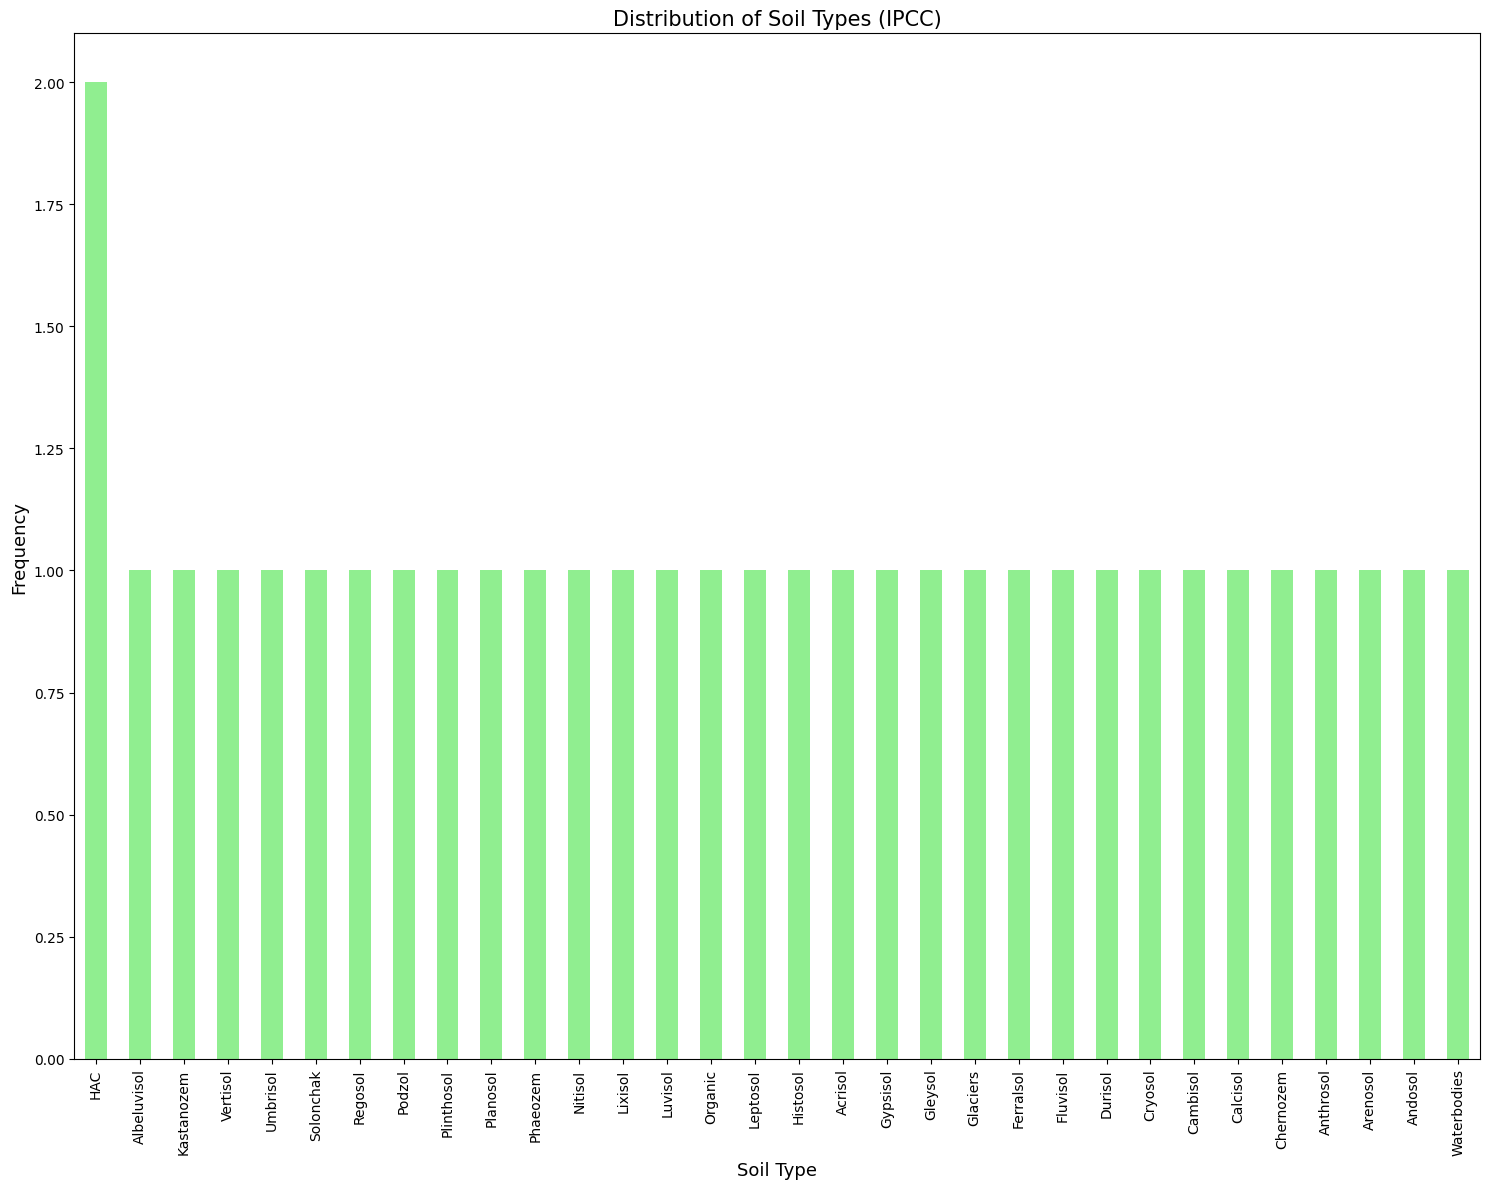

In [16]:
# Descriptive Analysis - Frequency of each soil type

# Count the frequency of each soil type based on 'IPCC'
ipcc_counts = soil_gdf['IPCC'].value_counts()

# Visualization
fig, axs = plt.subplots(1, 1, figsize=(15, 12))

# Bar chart for 'IPCC' distribution
ipcc_counts.plot(kind='bar', color='lightgreen')
axs.set_title('Distribution of Soil Types (IPCC)', fontsize=15)
axs.set_xlabel('Soil Type', fontsize=13)
axs.set_ylabel('Frequency', fontsize=13)
axs.grid(False)

plt.tight_layout()
plt.show()



### Soil biodiversity Spatial Analysis
#### Spatial joins

In [17]:
# Spatial join
overlay = gpd.sjoin(hotspot_gdf, soil_gdf, how="inner", op='intersects')

# Group by biodiversity hotspot name and count unique soil types
soil_diversity_in_hotspots = overlay.groupby('NAME')['SNAME'].nunique().reset_index()
soil_diversity_in_hotspots.columns = ['Biodiversity Hotspot', 'Unique Soil Types']
soil_diversity_in_hotspots = soil_diversity_in_hotspots.sort_values(by='Unique Soil Types', ascending=False)

# Display results
print(soil_diversity_in_hotspots)


                             Biodiversity Hotspot  Unique Soil Types
21                                    Mesoamerica                 13
20                            Mediterranean Basin                 13
32                                 Tropical Andes                 12
26                   North American Coastal Plain                 12
9                             Eastern Afromontane                 12
0                                 Atlantic Forest                 11
6   Chilean Winter Rainfall and Valdivian Forests                 10
14                                     Indo-Burma                 10
13                                 Horn of Africa                  9
19                    Maputaland-Pondoland-Albany                  8
15                                Irano-Anatolian                  8
18                     Madrean Pine-Oak Woodlands                  8
5                                         Cerrado                  8
4                                 

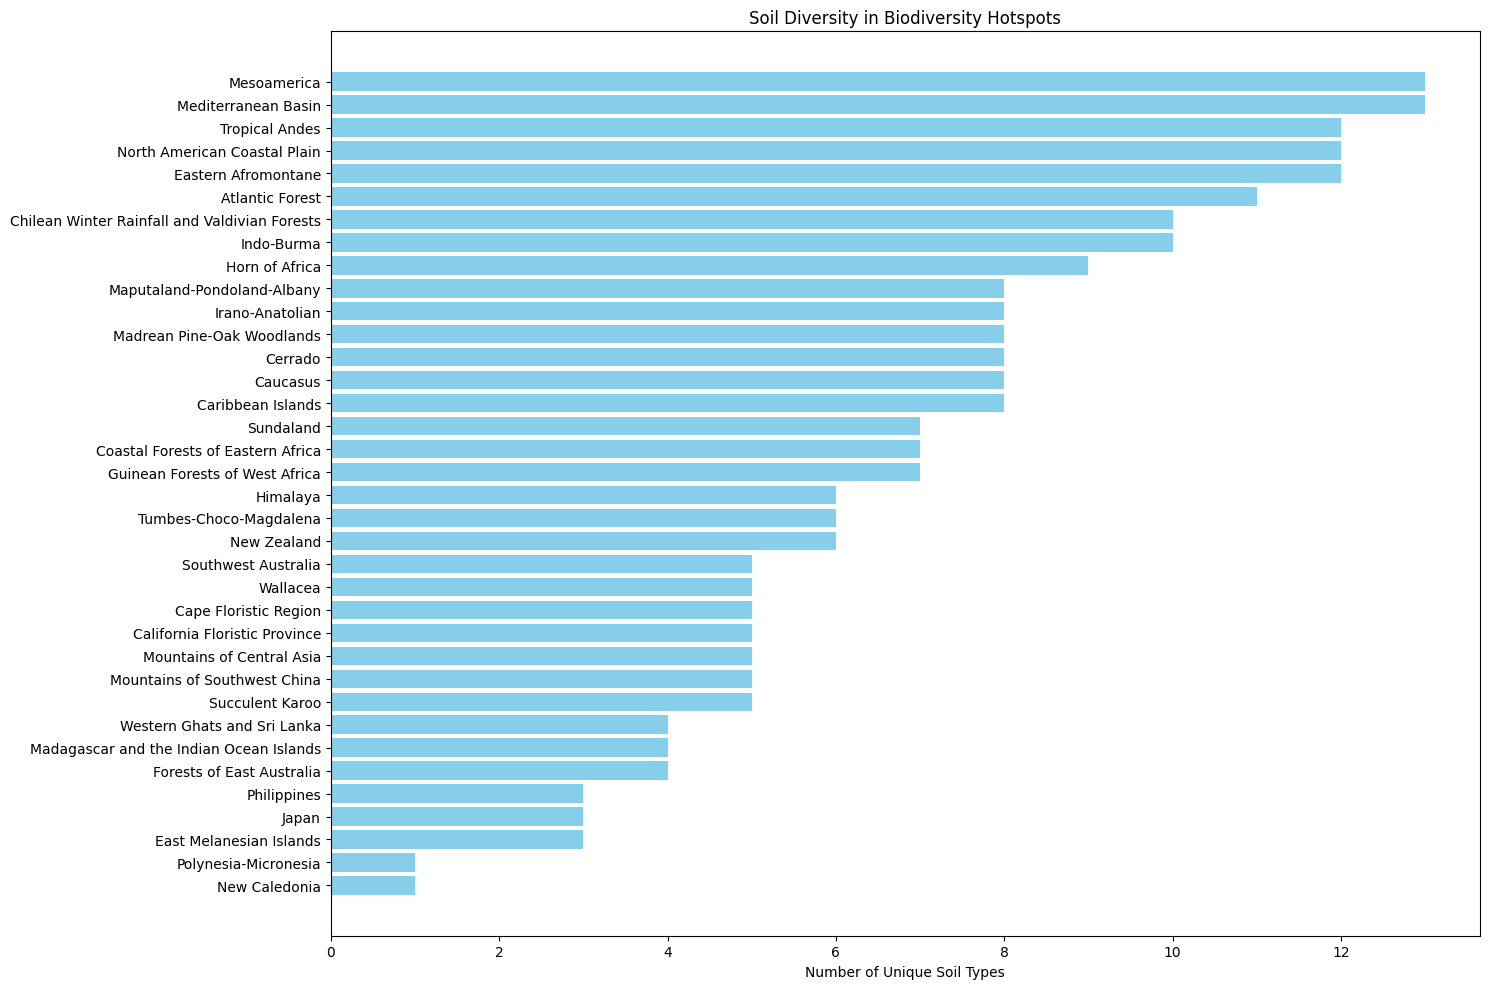

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'soil_diversity_in_hotspots' contains your data
plt.figure(figsize=(15, 10))
plt.barh(soil_diversity_in_hotspots['Biodiversity Hotspot'], soil_diversity_in_hotspots['Unique Soil Types'], color='skyblue')
plt.xlabel('Number of Unique Soil Types')
plt.title('Soil Diversity in Biodiversity Hotspots')
plt.gca().invert_yaxis()  # to have the bars in descending order
plt.tight_layout()
plt.show()


### Observations
The graph showcases the "Soil Diversity in Biodiversity Hotspots" by presenting the number of unique soil types across various regions:

* "Mesoamerica" stands out with the highest soil diversity, having over 10 unique soil types.
* Several regions such as the "Mediterranean Basin," "Tropical Andes," and "North American Coastal Plain" also display high soil diversity, each approaching 10 unique types.
* On the contrary, regions like "East Melanesian Islands," "Polynesia-Micronesia," and "New Caledonia" have the least soil diversity, with fewer than 3 unique soil types.
* Most of the hotspots lie in the middle range, having between 5 to 8 unique soil types.


This distribution indicates varying ecological complexities across these biodiversity hotspots. While some areas may present diverse habitats due to the richness in soil types, others might have specialized niches because of more limited soil diversity.

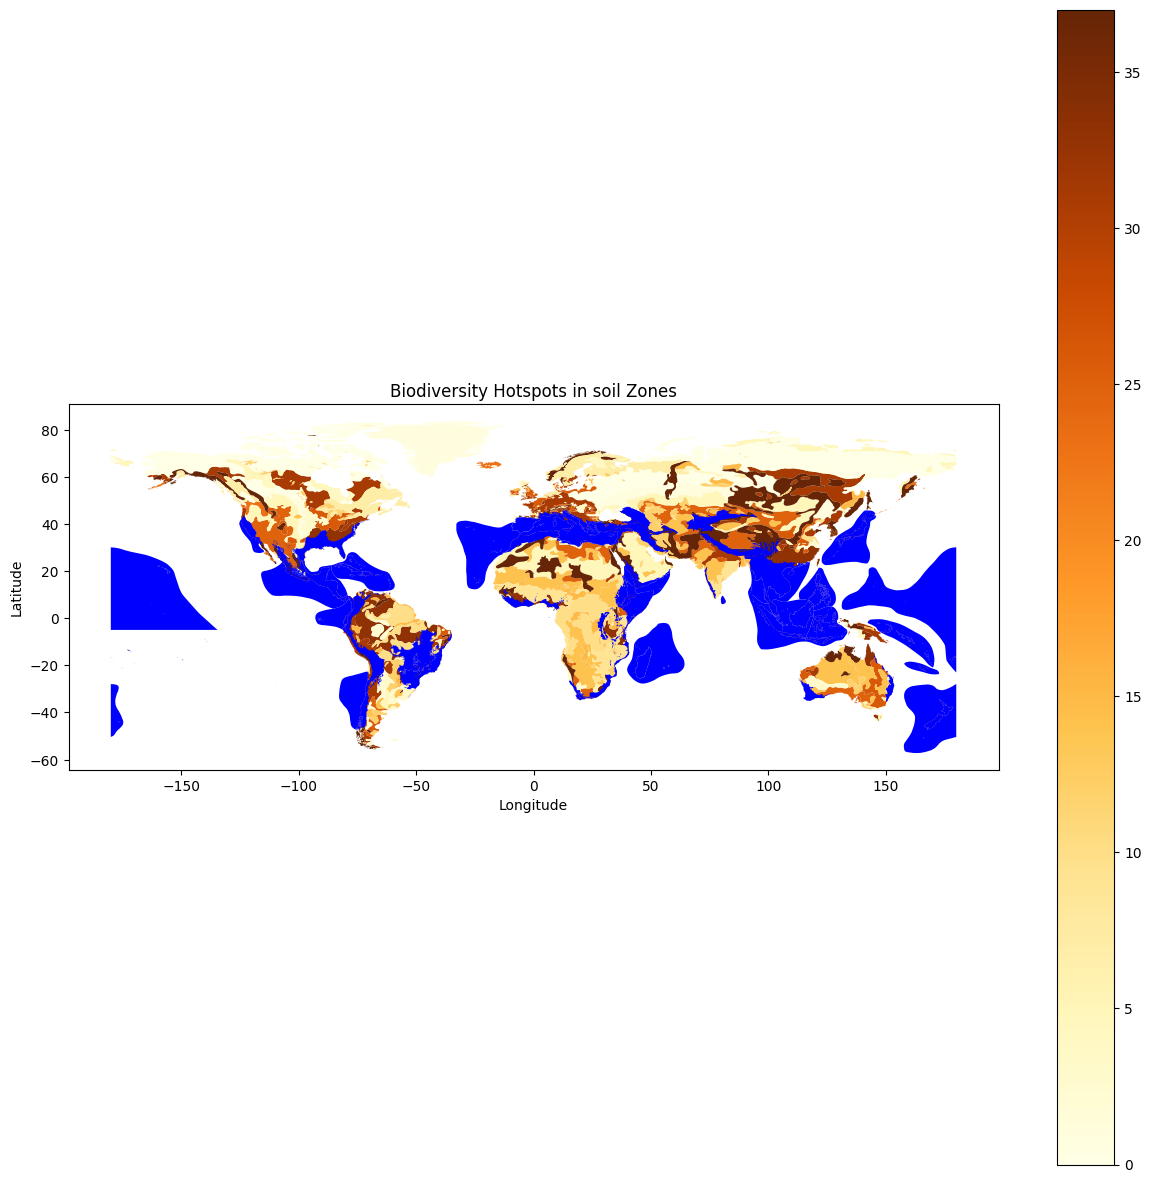

In [19]:
# Drop the existing 'Hotspot_Count' column if it exists
if 'Hotspot_Count' in soil_gdf.columns:
    mapped_climate = mapped_climate.drop(columns=['Hotspot_Count'])
    
# Aggregate and count the number of hotspots in each soil zone
hotspot_counts_by_soil = overlay.groupby('IPCC').size()
hotspot_counts_by_soil.name = 'Hotspot_Count'  

# Merge the counts back into the climate GeoDataFrame
soil_gdf = soil_gdf.merge(hotspot_counts_by_soil, left_on='IPCC', right_index=True, how='left').fillna(0)  

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
soil_gdf.plot(column='Hotspot_Count', cmap='YlOrBr', legend=True, ax=ax)
hotspot_gdf.plot(ax=ax, color='blue', markersize=10, label='Biodiversity Hotspots')
plt.title('Biodiversity Hotspots in soil Zones')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Observations
The map illustrates "Biodiversity Hotspots in Soil Zones" on a global scale:

The color gradient, ranging from pale yellow to deep brown, represents the intensity of soil biodiversity within a particular area. Darker shades indicate zones with higher soil biodiversity, while lighter shades represent lower biodiversity.

Areas of high soil biodiversity are notably prevalent in parts of Central Africa, South America, the Himalayan region, and parts of Southeast Asia.

Conversely, vast stretches of land, including deserts, the polar regions, and parts of North America and Eurasia, show minimal soil biodiversity.

The deep blue regions, which primarily appear in oceanic zones, likely represent areas where data is not available or are not applicable.

This global overview underlines the varying concentrations of soil biodiversity, which can be pivotal for ecosystem services, agriculture, and conservation planning. The regions with high soil biodiversity may harbor unique and diverse species that play critical roles in nutrient cycling, soil structure, and overall ecosystem health.

## Climate

In [20]:
climate_gdf.head()

,CLASS_NAME,geometry
0,0,"MULTIPOLYGON (((-37.65000 83.50000, -37.65000 ..."
1,0,"MULTIPOLYGON (((-38.75000 83.40000, -38.75000 ..."
2,0,"MULTIPOLYGON (((-38.60000 83.40000, -38.60000 ..."
3,0,"MULTIPOLYGON (((-37.15000 83.40000, -37.15000 ..."
4,5,"MULTIPOLYGON (((-40.40000 83.40000, -40.40000 ..."


In [21]:
climate_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 26165 entries, 0 to 26164
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CLASS_NAME  26165 non-null  int64   
 1   geometry    26165 non-null  geometry
dtypes: geometry(1), int64(1)
memory usage: 409.0 KB


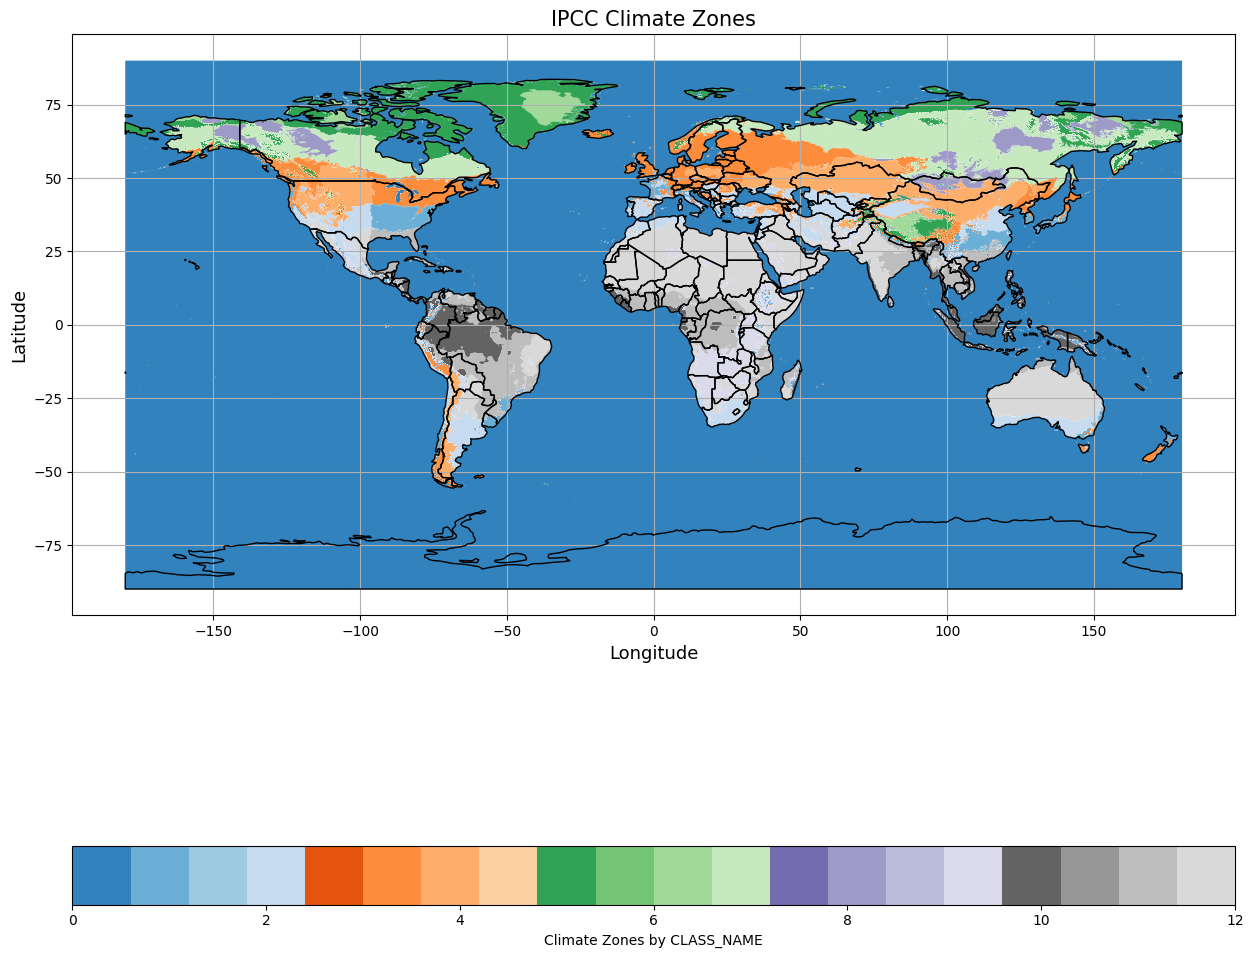

array([ 0,  5,  6,  7,  8,  3,  4,  1,  2, 12, 11,  9, 10], dtype=int64)

In [22]:
# Check unique values in 'CLASS_NAME'
unique_classes = climate_gdf['CLASS_NAME'].unique()

# Corrected Climate Zone Visualization
fig, ax = plt.subplots(1, 1, figsize=(15, 20))
world.boundary.plot(ax=ax, linewidth=1, color='black')

# Plot the climate zones
climate_gdf.plot(column='CLASS_NAME', ax=ax, legend=True, cmap='tab20c', legend_kwds={'label': "Climate Zones by CLASS_NAME", 'orientation': "horizontal"})
plt.title('IPCC Climate Zones', fontsize=15)
plt.xlabel('Longitude', fontsize=13)
plt.ylabel('Latitude', fontsize=13)
plt.grid(True)
plt.show()

unique_classes


In [23]:
mapped_climate = climate_gdf.copy()

In [24]:
# Create a dictionary mapping the class numbers to their respective names
climate_zone_mapping = {
    0: "Not Defined",
    1 : "Warm Temperate Moist",
    2 : "Warm Temperate Dry",
    3 : "Cool Temperate Moist",
    4 : "Cool Temperate Dry",
    5 : "Polar Moist",
    6 : "Polar Dry",
    7 : "Boreal Moist",
    8 : "Boreal Dry",
    9 : "Tropical Montane",
   10 : "Tropical Wet",
   11 : "Tropical Moist",
   12 : "Tropical Dry"
}

# Replace the numbers in the CLASS_NAME column with their corresponding names
mapped_climate['CLASS_NAME'] = mapped_climate['CLASS_NAME'].replace(climate_zone_mapping)


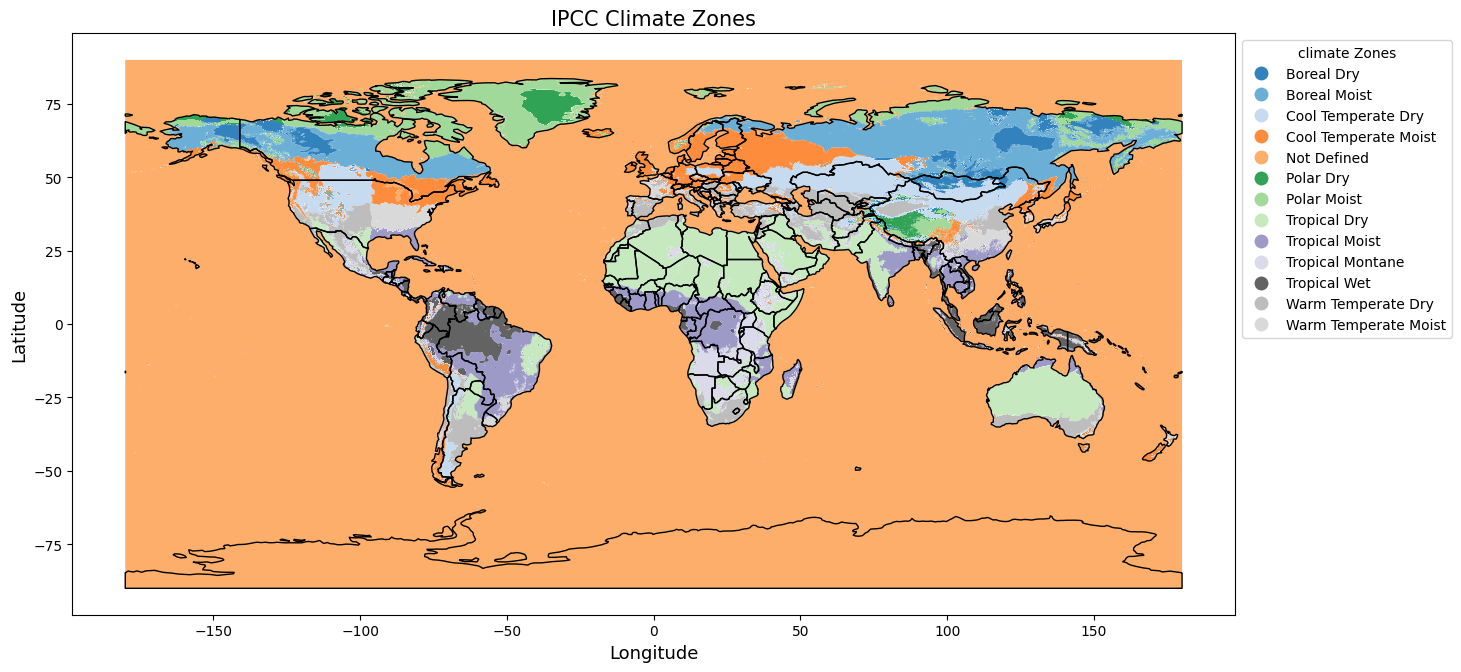

array(['Not Defined', 'Polar Moist', 'Polar Dry', 'Boreal Moist',
       'Boreal Dry', 'Cool Temperate Moist', 'Cool Temperate Dry',
       'Warm Temperate Moist', 'Warm Temperate Dry', 'Tropical Dry',
       'Tropical Moist', 'Tropical Montane', 'Tropical Wet'], dtype=object)

In [25]:
# Check unique values in 'CLASS_NAME'
unique_classes = mapped_climate['CLASS_NAME'].unique()

# Climate Zone Visualization
fig, ax = plt.subplots(1, 1, figsize=(15, 20))
world.boundary.plot(ax=ax, linewidth=1, color='black')

# Plot the climate zones
mapped_climate.plot(column='CLASS_NAME', ax=ax, legend=True, cmap='tab20c', legend_kwds={'title': "climate Zones",
                         'bbox_to_anchor': (1, 1), 'loc': 'upper left'})
plt.title('IPCC Climate Zones', fontsize=15)
plt.xlabel('Longitude', fontsize=13)
plt.ylabel('Latitude', fontsize=13)
plt.grid(False)
plt.show()

unique_classes

The map underscores the diversity of the world's climates and provides a comprehensive visual of where each climate type is predominantly located.

In [26]:
# Spatial join
gdf_soil_climate = gpd.sjoin(soil_gdf, mapped_climate, how="inner", op='intersects')


In [27]:
soil_climate_counts = gdf_soil_climate.groupby('CLASS_NAME').size()
print(soil_climate_counts)


CLASS_NAME
Boreal Dry              1580
Boreal Moist            3154
Cool Temperate Dry      1881
Cool Temperate Moist    2884
Not Defined             2417
Polar Dry               1171
Polar Moist             2958
Tropical Dry            1044
Tropical Moist          1490
Tropical Montane        4159
Tropical Wet             786
Warm Temperate Dry      1823
Warm Temperate Moist    2224
dtype: int64


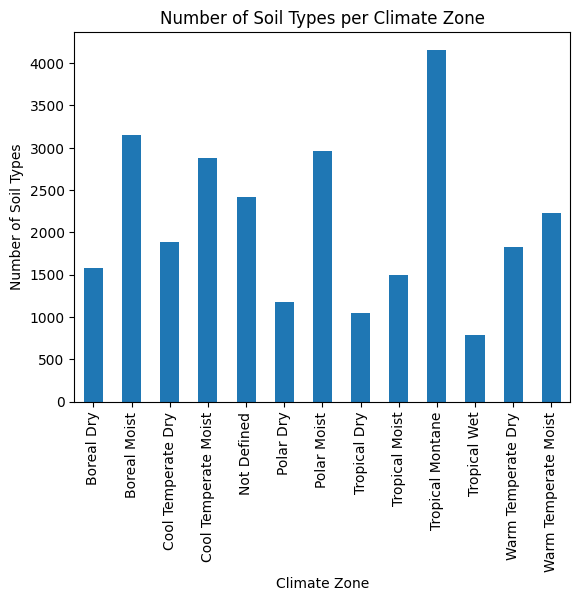

In [28]:
soil_climate_counts.plot(kind='bar')
plt.title('Number of Soil Types per Climate Zone')
plt.xlabel('Climate Zone')
plt.ylabel('Number of Soil Types')
plt.show()


### Observations
The "Boreal, dry" climate zone stands out with the highest number of soil types, approaching 4000.

Following this, "Boreal, moist" and "Warm temperate, moist" have considerable numbers of soil types, each surpassing 3000.

The climate zones "Cool temperate, dry," "Not Defined," and "Warm temperate, dry" exhibit a moderate range of soil diversity, each with values between 1500 to 2500.

"Polar, dry," "Tropical, dry," "Tropical, moist," and "Tropical, wet" have similar counts, with each showcasing between 1000 to 2000 soil types.

"Cool temperate, moist" and "Tropical montane" represent the lower end of the spectrum, with less than 1000 soil types.

In summary, boreal climates, particularly the dry variant, possess the most diverse range of soils. In contrast, cool temperate and tropical montane regions exhibit comparatively limited soil diversity. The data underscores the intricate relationship between climate and soil formation, with certain climates fostering a wider array of soil types.

### Area Calculation

In [29]:
mapped_climate['area_km2'] = mapped_climate['geometry'].area / 10**6
total_area_by_zone = mapped_climate.groupby('CLASS_NAME').area_km2.sum()
print(total_area_by_zone)


CLASS_NAME
Boreal Dry              0.000617
Boreal Moist            0.002313
Cool Temperate Dry      0.001418
Cool Temperate Moist    0.001538
Not Defined             0.049430
Polar Dry               0.000394
Polar Moist             0.001735
Tropical Dry            0.002684
Tropical Moist          0.001470
Tropical Montane        0.000623
Tropical Wet            0.000771
Warm Temperate Dry      0.001263
Warm Temperate Moist    0.000543
Name: area_km2, dtype: float64


### Spatial Analysis
* overlay the biodiversity hotspots data on the climate zones map to see how they coincide.
* Hotspot Analysis in Climate Context: Analyze the distribution of biodiversity hotspots across different climate zones. This involves checking how many hotspots are present in each climate zone and their proportion.
* Spatial Correlation Analysis: Investigate if certain climate zones have a higher number of biodiversity hotspots, indicating a possible correlation between climate conditions and biodiversity.

#### overlay the biodiversity hotspots data on the climate zones map to see how they coincide.

In [30]:
# Check the CRS for both datasets
print(hotspot_gdf.crs)
print(mapped_climate.crs)

EPSG:4326
EPSG:4326


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


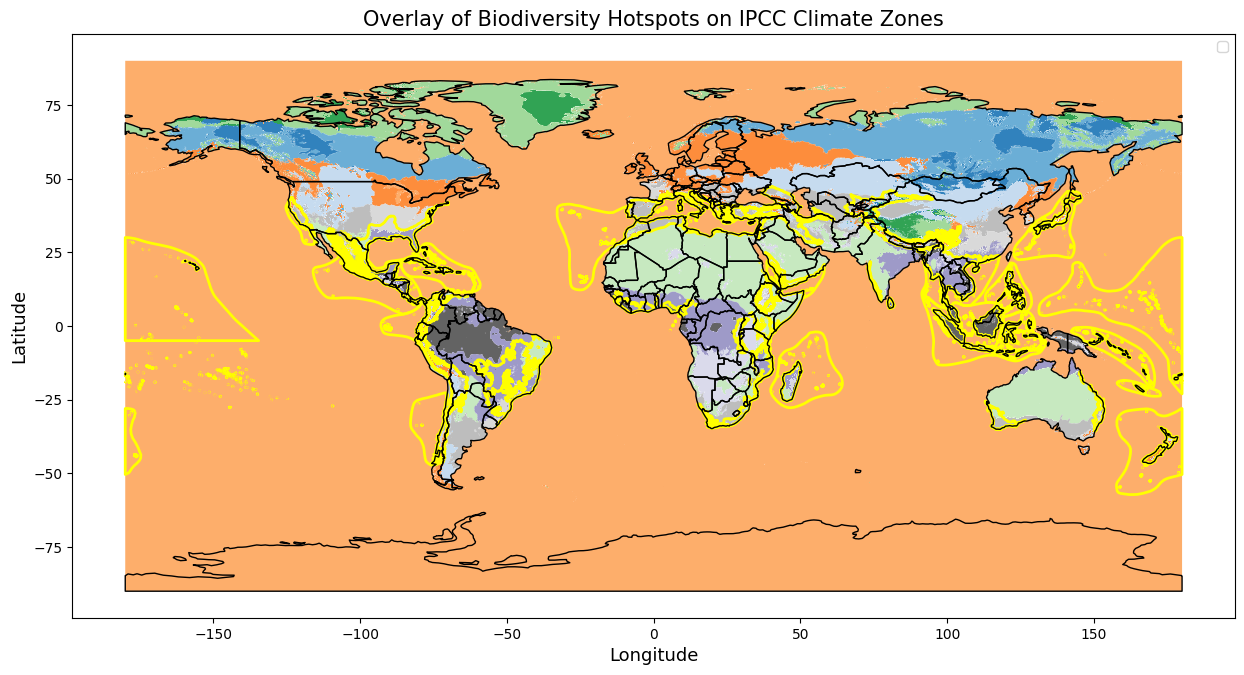

In [31]:
# Overlay of Biodiversity Hotspots on Climate Zones
fig, ax = plt.subplots(1, 1, figsize=(15, 20))
world.boundary.plot(ax=ax, linewidth=1, color='black')


# Plot the climate zones
mapped_climate.plot(column='CLASS_NAME', ax=ax, cmap='tab20c', legend=True, 
                 legend_kwds={'title': "Climate Zones by CLASS_NAME"})

# Overlay the biodiversity hotspots
hotspot_gdf.plot(ax=ax, facecolor='none', edgecolor='yellow', linewidth=2, label='Biodiversity Hotspots')

plt.title('Overlay of Biodiversity Hotspots on IPCC Climate Zones', fontsize=15)
plt.xlabel('Longitude', fontsize=13)
plt.ylabel('Latitude', fontsize=13)
plt.legend()
plt.grid(False)
plt.show()


### Observations
Biodiversity Hotspots: These are highlighted by yellow outlines, often enclosing regions with high levels of endemic species and significant habitat loss. Notable hotspots are visible in:

The western coast of North and Central America.
Regions within South America, particularly around the Andes and the Atlantic Forest region.
Parts of southern and eastern Africa.
The Western Ghats in India.
Parts of Southeast Asia and Oceania.
Eastern Australia.
IPCC Climate Zones: Different colors represent various climate zones. Without a legend, exact identification of each zone is challenging, but we can infer general patterns:

The orange/brown that dominates much of the map could represent arid or desert climates.
The green shades, especially concentrated in the Amazon basin, central Africa, and Southeast Asia, likely signify tropical climates.
Blue and light blue in regions like the Andes, Himalayas, and other mountainous areas could represent montane or alpine climates.
The gray and purple hues in the northern parts of North America, Europe, and Asia might signify temperate or polar climates.
Overlap: Biodiversity hotspots tend to overlap with specific climate zones, suggesting a potential correlation between biodiversity and certain climates. For instance:

The tropical rainforests of the Amazon, Central Africa, and Southeast Asia, denoted by green, have clear hotspots, emphasizing the rich biodiversity in these regions.
Mountainous regions, like the Andes and the Himalayas, also show overlaps with hotspots, highlighting the unique biodiversity found in montane environments.
In summary, the map provides a compelling visual representation of the relationship between biodiversity hotspots and various climate zones. It underscores the significance of certain climates, especially tropical and montane zones, in hosting and supporting rich biodiversity. This overlay is crucial for conservationists and policymakers, as it identifies critical regions that require focused conservation efforts.







#### Hotspot Analysis in Climate Context: Analyze the distribution of biodiversity hotspots across different climate zones. This involves checking how many hotspots are present in each climate zone and their proportion.

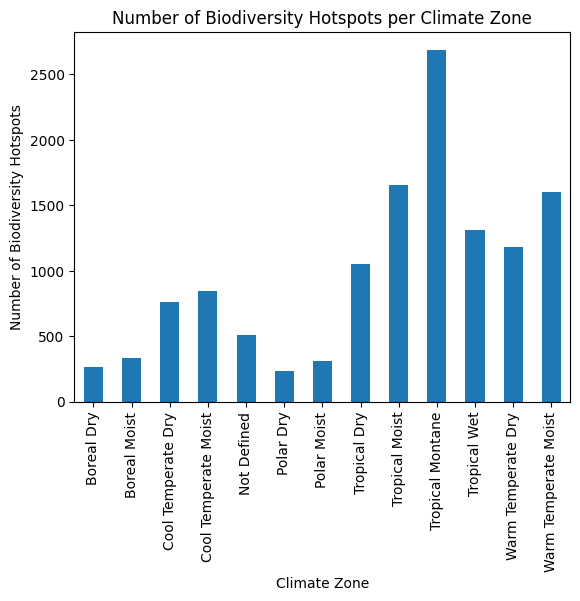

In [32]:
gdf_hotspots_in_climate = gpd.sjoin(hotspot_gdf, mapped_climate, how="inner", op='intersects')

hotspot_counts_by_climate = gdf_hotspots_in_climate.groupby('CLASS_NAME').size()

hotspot_counts_by_climate.plot(kind='bar')
plt.title('Number of Biodiversity Hotspots per Climate Zone')
plt.xlabel('Climate Zone')
plt.ylabel('Number of Biodiversity Hotspots')
plt.show()


### Observations

Boreal dry zones have the highest biodiversity hotspots, which may seem counterintuitive given the often-cold nature of boreal regions. This could be due to a variety of reasons, including the vastness of boreal forests or unique ecological niches present.

Montane regions, irrespective of whether they are tropical or temperate, tend to have a higher number of biodiversity hotspots. This could be due to the diverse range of habitats and microclimates that mountains provide.

Polar regions have the fewest biodiversity hotspots, which is expected given the extreme conditions and limited variety of species that can thrive there.

Overall, this chart provides a comprehensive overview of how biodiversity hotspots are distributed across different climate zones, offering crucial insights for conservation and ecological studies.






#### Spatial Autocorrelation

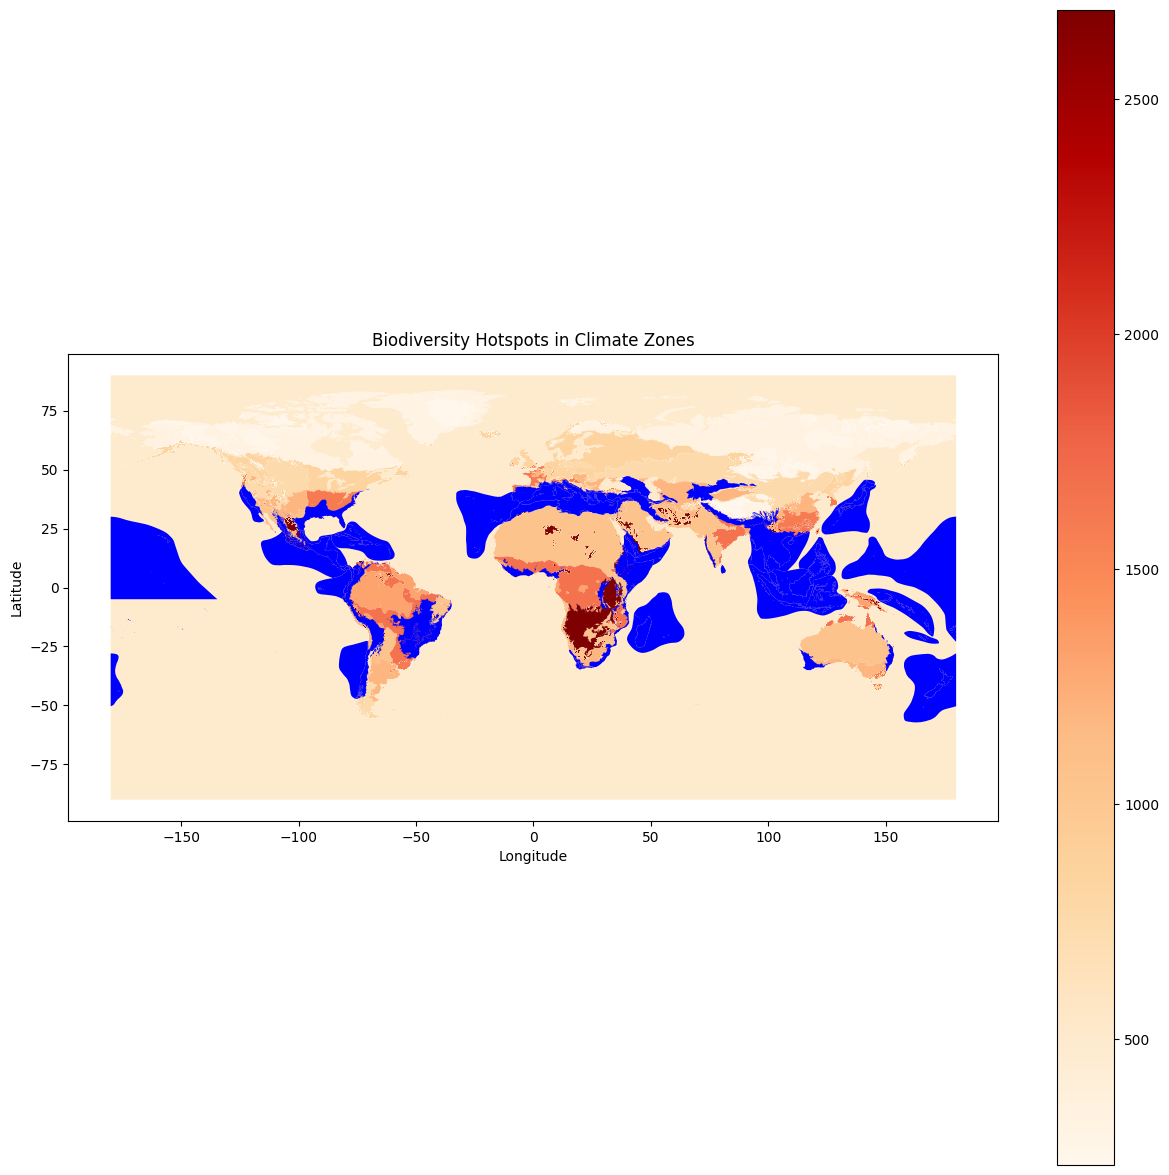

In [33]:
# Drop the existing 'Hotspot_Count' column if it exists
if 'Hotspot_Count' in mapped_climate.columns:
    mapped_climate = mapped_climate.drop(columns=['Hotspot_Count'])

# Aggregate and count the number of hotspots in each climate zone
hotspot_counts_by_climate = gdf_hotspots_in_climate.groupby('CLASS_NAME').size()
hotspot_counts_by_climate.name = 'Hotspot_Count'  

# Merge the counts back into the climate GeoDataFrame
mapped_climate = mapped_climate.merge(hotspot_counts_by_climate, left_on='CLASS_NAME', right_index=True, how='left').fillna(0)  

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
mapped_climate.plot(column='Hotspot_Count', cmap='OrRd', legend=True, ax=ax)
hotspot_gdf.plot(ax=ax, color='blue', markersize=10, label='Biodiversity Hotspots')
plt.title('Biodiversity Hotspots in Climate Zones')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



### Observations
Prominent Hotspots: The Amazon basin, Congo basin, Western Ghats and Eastern Himalayas in India, Southeast Asia, and northeastern Australia stand out as biodiversity-rich areas.

Island Biodiversity: Islands like Madagascar, the Caribbean, and those in Southeast Asia house unique ecosystems due to their isolation, making them hotspots.

Moderate Biodiversity in North America: While much of North America has moderate levels, the western coastline, with its temperate rainforests, is a notable hotspot.

Lower Biodiversity in Cold Climates: Northern Asia, Europe, and polar regions have fewer biodiversity hotspots due to harsher climates.

Highlight: These hotspot regions are pivotal for conservation, indicating where global efforts and resources should be concentrated to protect our planet's rich biodiversity.

## Conclusion

The analysis successfully delved into the spatial relationships between soil, climate, and biodiversity. By examining datasets on soil types, climate zones, and biodiversity hotspots, the study revealed valuable patterns and correlations that could guide environmental policies and conservation strategies.

#### Biodiversity Hotspot Patterns:

Biodiversity hotspots exhibit spatial clustering in specific regions known for rich biodiversity, such as the Amazon basin, Central Africa, Southeast Asia, and Australia.
Hotspots are frequently located near water bodies, emphasizing the significance of aquatic ecosystems in supporting biodiversity.
The equatorial region, with its stable tropical climate, stands out as a high-density area for biodiversity hotspots.
Distribution of Soil Types: The spatial distribution of soil offers insights into various habitats and the potential species that can thrive. With regions like Mesoamerica and the Mediterranean Basin having a diverse range of soil types, it underscores the ecological richness of these areas.

#### Climate Zone Implications:

Biodiversity hotspots are not evenly distributed across different climate zones. Regions with stable, warm climates (like tropical zones) support more biodiversity compared to harsher, colder climates.
The spatial distribution of biodiversity hotspots within climate zones offers a roadmap for conservationists, indicating areas of high ecological importance.
#### Conservation Focus:

Certain areas, such as the Amazon basin, Congo basin, and Western Ghats, among others, are pivotal for conservation efforts due to their rich biodiversity.
The findings highlight the need for focused conservation strategies in these regions to protect diverse ecosystems and the species they support.
General Observations: The spatial patterns of biodiversity hotspots relative to soil types and climate zones provide a holistic view of our planet's ecological richness. It is evident that while some areas are teeming with life and diversity, others, especially those impacted by urbanization, agriculture, or extreme climates, show gaps in biodiversity.

In summary, this analysis offers a comprehensive understanding of the spatial patterns defining our environment. The insights derived can be instrumental in directing conservation efforts, shaping environmental policies, and fostering a better appreciation of the intricate relationships that exist in our natural world.